# Travaux pratiques 2

**Année: 2024-2025**

## Objectifs

1. **Modélisation de connaissances et interrogation de données** : Utiliser un langage logique pour structurer une base de connaissances et créer des règles permettant d’extraire des informations spécifiques à partir des données.

2. **Classification de textes et d'images** : Concevoir et entraîner des modèles de réseaux de neurones pour la classification de textes (exercice 2.2) et d'images (exercice 2.4), en maîtrisant le prétraitement des données, l'optimisation des hyperparamètres, et l'évaluation des performances des modèles.

3. **Prédiction de séquences** : Développer un modèle de prédiction pour des séquences de traductions, en appliquant des techniques de préparation de données séquentielles et en évaluant les performances du modèle sur des données de test.

- Faits
    - `eleve(Nom, Prenom, DateNaissance)`: Informations personnelles des élèves.
    - `groupe_projet(Eleve, Groupe)`: Groupes de projet auxquels les élèves appartiennent.
    - `note(Eleve, Module, Note)`: Notes des élèves dans différents modules.
    - `module(NomModule, Description)`: Liste des modules avec leur nom et description.
- Règles
    - `eleves_groupe(Groupe, Eleves)`: Trouver tous les élèves d’un groupe de projet spécifique.
    - `moyenne_notes(Eleve, Module, Moyenne)`: Calculer la moyenne des notes d’un élève dans un module.
    - `modules_suivis(Eleve, Modules)`: Lister les modules suivis par un élève.

- Exemples de requetes pour questionner la base de connaissance:
    - `?- eleves_groupe('Groupe1', Eleves).`
    - `?- moyenne_notes('Dupont', 'Math', Moyenne).`
    - `?- modules_suivis('Martin', Modules).`


# Exercice 2.2

In [19]:
%pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.reuters import load_data
from tensorflow.keras.preprocessing.sequence import pad_sequences

(x_train, y_train), (x_test, y_test) = load_data(num_words=10000)

Exemple de séquence d'entraînement après tokenisation et padding :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Label correspondant :
3


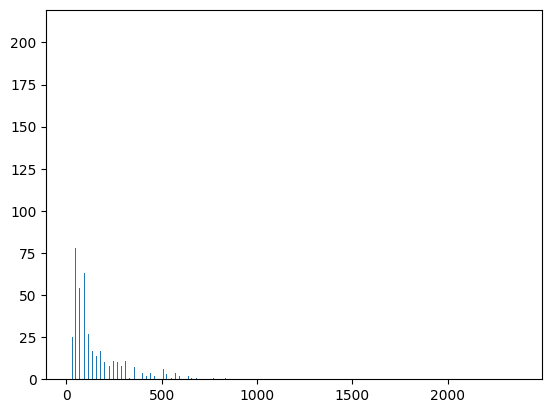

In [21]:
x_train_lenths = [len(x) for x in x_train]
plt.hist(x_train_lenths, bins=len(x_train_lenths))

max_words = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)

word_index = tf.keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

train_sequences = tokenizer.sequences_to_texts(x_train)
test_sequences = tokenizer.sequences_to_texts(x_test)

train_sequences = tokenizer.texts_to_sequences(train_sequences)
test_sequences = tokenizer.texts_to_sequences(test_sequences)

maxlen = 256
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

print("Exemple de séquence d'entraînement après tokenisation et padding :")
print(train_padded[0])
print("Label correspondant :")
print(y_train[0])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

# Définir les paramètres du modèle
vocab_size = 10000
embedding_dim = 16
maxlen = 256

# Créer le modèle
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    # 46 classes dans le jeu de données Reuters
    Dense(46, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

# Entraîner le modèle
history = model.fit(train_padded, y_train, epochs=10,
                    validation_data=(test_padded, y_test), verbose=2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
281/281 - 1s - 3ms/step - accuracy: 0.3408 - loss: 2.7232 - val_accuracy: 0.3620 - val_loss: 2.4256
Epoch 2/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4120 - val_accuracy: 0.3620 - val_loss: 2.4187
Epoch 3/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4093 - val_accuracy: 0.3620 - val_loss: 2.4200
Epoch 4/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4085 - val_accuracy: 0.3620 - val_loss: 2.4221
Epoch 5/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4079 - val_accuracy: 0.3620 - val_loss: 2.4227
Epoch 6/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4085 - val_accuracy: 0.3620 - val_loss: 2.4185
Epoch 7/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4094 - val_accuracy: 0.3620 - val_loss: 2.4207
Epoch 8/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4079 - val_accuracy: 0.3620 - val_loss: 2.4163
Epoch 9/10
281/281 - 0s - 2ms/step - accuracy: 0.3517 - loss: 2.4082 - val_accuracy: 0.3620 - val_loss: 2.4181
E

In [24]:
from tensorflow.keras.layers import LSTM

# Créer le modèle avec LSTM
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])

# Compiler le modèle
model_lstm.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Afficher le résumé du modèle
model_lstm.summary()

# Entraîner le modèle
history_lstm = model_lstm.fit(train_padded, y_train, epochs=10, validation_data=(
    test_padded, y_test), verbose=2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
281/281 - 15s - 54ms/step - accuracy: 0.3461 - loss: 2.5142 - val_accuracy: 0.3620 - val_loss: 2.4198
Epoch 2/10
281/281 - 14s - 49ms/step - accuracy: 0.3517 - loss: 2.4134 - val_accuracy: 0.3620 - val_loss: 2.4218
Epoch 3/10
281/281 - 14s - 48ms/step - accuracy: 0.3517 - loss: 2.4152 - val_accuracy: 0.3620 - val_loss: 2.4213
Epoch 4/10
281/281 - 14s - 48ms/step - accuracy: 0.3517 - loss: 2.4125 - val_accuracy: 0.3620 - val_loss: 2.4264
Epoch 5/10
281/281 - 13s - 48ms/step - accuracy: 0.3517 - loss: 2.4107 - val_accuracy: 0.3620 - val_loss: 2.4258
Epoch 6/10
281/281 - 14s - 48ms/step - accuracy: 0.3517 - loss: 2.4108 - val_accuracy: 0.3620 - val_loss: 2.4152
Epoch 7/10
281/281 - 13s - 48ms/step - accuracy: 0.3517 - loss: 2.4107 - val_accuracy: 0.3620 - val_loss: 2.4172
Epoch 8/10
281/281 - 13s - 48ms/step - accuracy: 0.3517 - loss: 2.4103 - val_accuracy: 0.3620 - val_loss: 2.4193
Epoch 9/10
281/281 - 13s - 48ms/step - accuracy: 0.3517 - loss: 2.4094 - val_accuracy: 0.3620 - 

In [ ]:
from tensorflow.keras.layers import GRU

# Créer le modèle avec GRU
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])

# Compiler le modèle
model_gru.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Afficher le résumé du modèle
model_gru.summary()

# Entraîner le modèle
history_gru = model_gru.fit(train_padded, train_labels, epochs=10, validation_data=(
    test_padded, test_labels), verbose=2)